<a href="https://colab.research.google.com/github/pavitrageez/ML/blob/main/Chilika_SOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy rasterio matplotlib scikit-learn spectral joblib envi

In [ ]:
import pandas as pd
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Read files
Chilika = pd.read_csv('/content/drive/MyDrive/Chilika/Chilika.csv')

# Number of rows and columns
print(Chilika.shape)
print(Chilika.head())

(57, 339)
   Org_Car_g_per_kg  451.570007  456.579987  461.589996  466.600006  \
0              11.5    0.125318    0.128103    0.130628    0.132921   
1               9.8    0.107640    0.110440    0.112804    0.114905   
2              11.6    0.136056    0.139186    0.141965    0.144473   
3              11.3    0.112899    0.115768    0.118348    0.120538   
4               8.8    0.122094    0.124926    0.127520    0.129835   

   471.600006  476.609985  481.619995  486.630005  491.640015  ...  \
0    0.135332    0.137748    0.140487    0.143680    0.147192  ...   
1    0.117128    0.119449    0.122240    0.125700    0.129611  ...   
2    0.147033    0.149662    0.152649    0.156230    0.160178  ...   
3    0.122891    0.125330    0.128228    0.131832    0.135878  ...   
4    0.132230    0.134726    0.137551    0.140808    0.144563  ...   

   2354.860107  2359.870117  2364.879883  2369.889893  2374.899902  \
0     0.450690     0.451755     0.450793     0.450965     0.450129   
1 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split inputs and target
X = Chilika.iloc[:,1:]
y = Chilika.iloc[:,0]

# Train-Test split, keeping a portion for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Linear Regression to determine R2 score, RMSE and Ratio of Performance to deviation(RPD)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("R2 score: ", r2_score(y_test, pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_lr)))
print("Ratio of Performance to deviation(RPD): ", r2_score(y_test, pred_lr))

R2 score:  0.23165529028652765
RMSE:  2.368270033552407
Ratio of Performance to deviation(RPD):  0.23165529028652765


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("R2 score: ", r2_score(y_test, pred_rf))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_rf)))
print("Ratio of Performance to deviation(RPD): ", r2_score(y_test, pred_rf))

R2 score:  0.22998161269454487
RMSE:  2.3708480198724993
Ratio of Performance to deviation(RPD):  0.22998161269454487


In [ ]:
# Partial Least Squares Regression
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression()
pls.fit(X_train, y_train)
pred_plsr = pls.predict(X_test)
print("R2 score: ", r2_score(y_test, pred_plsr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_plsr)))
print("Ratio of Performance to deviation(RPD): ", r2_score(y_test, pred_plsr))

R2 score:  0.16035132730478197
RMSE:  2.475722535934243
Ratio of Performance to deviation(RPD):  0.16035132730478197


In [ ]:
# Support vector regression
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
print("R2 score: ", r2_score(y_test, pred_svr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_svr)))
print("Ratio of Performance to deviation(RPD): ", r2_score(y_test, pred_svr))

R2 score:  0.18372655649072678
RMSE:  2.441018106240611
Ratio of Performance to deviation(RPD):  0.18372655649072678


In [ ]:
# Ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)
print("R2 score: ", r2_score(y_test, pred_ridge))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_ridge)))
print("Ratio of Performance to deviation(RPD): ", r2_score(y_test, pred_ridge))

R2 score:  0.17029921995501185
RMSE:  2.461013047890952
Ratio of Performance to deviation(RPD):  0.17029921995501185


In [ ]:
# Table comparing all 4 models and determining the best out of the 4
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


model_names = ["Linear Regression", "Random Forest", "PLSR", "SVR", "Ridge Regression"]

predictions = [
    pred_lr,     # linear regression predictions
    pred_rf,     # random forest predictions
    pred_plsr,   # plsr predictions
    pred_svr,    # svr predictions
    pred_ridge   # ridge predictions
]

# TRUE values from the test set
true = y_test   # Using real y_test variable

# Compute metrics for each model

R2_list = []
RMSE_list = []
RPD_list = []

for pred in predictions:
    R2_list.append(r2_score(true, pred))
    RMSE_list.append(np.sqrt(mean_squared_error(true, pred)))
    RPD_list.append(r2_score(true, pred))

# Create comparison table

results_df = pd.DataFrame({
    "Model": model_names,
    "R2": R2_list,
    "RMSE": RMSE_list,
    "RPD": RPD_list
})

# Ranking best model
results_df["Rank_R2"] = results_df["R2"].rank(ascending=False)
results_df["Rank_RMSE"] = results_df["RMSE"].rank(ascending=True)
results_df["Rank_RPD"] = results_df["RPD"].rank(ascending=False)
results_df["Final_Score"] = results_df["Rank_R2"] + results_df["Rank_RMSE"] + results_df["Rank_RPD"]

# Sort by best model
results_df = results_df.sort_values("Final_Score")

print("===== MODEL COMPARISON TABLE ====")
print(results_df)

print("\nBest Model:", results_df.iloc[0]["Model"])

===== MODEL COMPARISON TABLE ====
               Model        R2      RMSE       RPD  Rank_R2  Rank_RMSE  \
0  Linear Regression  0.231655  2.368270  0.231655      1.0        1.0   
1      Random Forest  0.229982  2.370848  0.229982      2.0        2.0   
3                SVR  0.183727  2.441018  0.183727      3.0        3.0   
4   Ridge Regression  0.170299  2.461013  0.170299      4.0        4.0   
2               PLSR  0.160351  2.475723  0.160351      5.0        5.0   

   Rank_RPD  Final_Score  
0       1.0          3.0  
1       2.0          6.0  
3       3.0          9.0  
4       4.0         12.0  
2       5.0         15.0  

Best Model: Linear Regression


In [ ]:
# Retrain the Linear regression and save using joblib
from sklearn.linear_model import LinearRegression
import joblib
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_train)
print("R2 score: ", r2_score(y_train, pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, pred_lr)))
print("Ratio of Performance to deviation(RPD): ", r2_score(y_train, pred_lr))

# Save the retrained model
joblib.dump(lr, 'linear_regression_model.joblib')

R2 score:  1.0
RMSE:  5.039893031510288e-13
Ratio of Performance to deviation(RPD):  1.0


['linear_regression_model.joblib']

In [ ]:
# Save using joblib
joblib.dump(lr, '/content/drive/MyDrive/Chilika/linear_regression_model.joblib')
print("Model saved successfully!")


Model saved successfully!


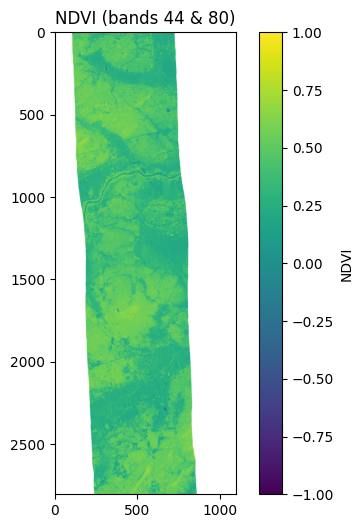

In [ ]:
# NDVI using band 44 (red) and 80 (NIR)
red = data[44, :, :].astype(np.float32)
nir = data[80, :, :].astype(np.float32)

ignore_val = -9999.0   # from HDR

# identify no-data pixels
invalid = (red == ignore_val) | (nir == ignore_val)

with np.errstate(divide='ignore', invalid='ignore'):
    ndvi = (nir - red) / (nir + red)

# set invalid pixels to NaN
ndvi[invalid] = np.nan

# clip valid NDVI
ndvi = np.clip(ndvi, -1, 1)

# create colormap
cmap = plt.cm.viridis.copy()
cmap.set_bad(color='white')

plt.figure(figsize=(6, 6))
plt.imshow(ndvi, cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI (bands 44 & 80)')
plt.show()


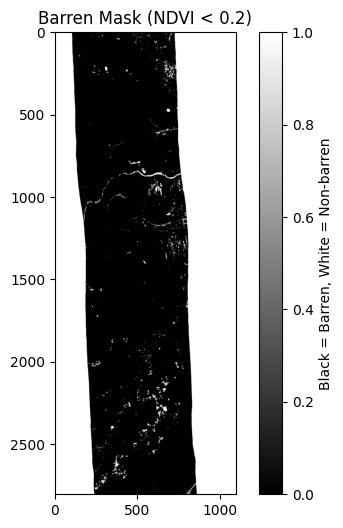

In [ ]:
threshold = 0.2   # use this if you want blue-ish areas to count as barren

barren = (ndvi < threshold).astype(float)
barren[np.isnan(ndvi)] = np.nan

cmap = plt.cm.binary_r.copy()
cmap.set_bad("white")

plt.figure(figsize=(6, 6))
plt.imshow(barren, cmap=cmap)
plt.title(f"Barren Mask (NDVI < {threshold})")
plt.colorbar(label="Black = Barren, White = Non-barren")
plt.show()


In [ ]:
print("NDVI min/max:", np.nanmin(ndvi), np.nanmax(ndvi))


NDVI min/max: -0.11697295 0.7229489


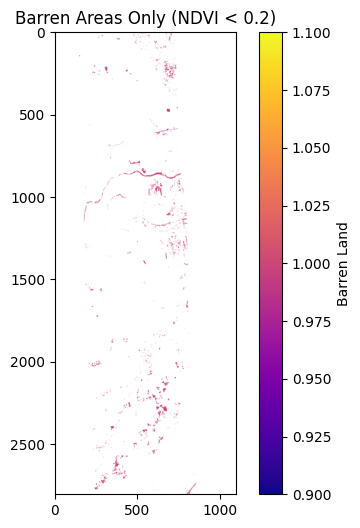

In [ ]:
threshold = 0.2
barren = (ndvi < threshold)

# Create barren-only mask:
barren_only = np.where(barren, 1, np.nan)   # barren = 1, else = NaN

# Apply NDVI NaNs to remove side strips too:
barren_only[np.isnan(ndvi)] = np.nan

# Color map for barren
cmap = plt.cm.plasma.copy()
cmap.set_bad('white')  # NaN = blank / invisible

plt.figure(figsize=(6,6))
plt.imshow(barren_only, cmap=cmap)
plt.title("Barren Areas Only (NDVI < 0.2)")
plt.colorbar(label="Barren Land")
plt.show()
